In [2]:
# please ignore warning messages during the installation
!pip install --disable-pip-version-check -q sagemaker==2.35.0
!conda install -q -y pytorch==1.6.0 -c pytorch
!pip install --disable-pip-version-check -q transformers==3.5.1

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done


In [300]:
import pandas as pd

In [301]:
stock_df = pd.read_csv("tweets_labelled_09042020_16072020.csv", sep=';')

In [302]:
stock_df.head()

,id,created_at,text,sentiment
0,77522,2020-04-15 01:03:46+00:00,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",positive
1,661634,2020-06-25 06:20:06+00:00,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,negative
2,413231,2020-06-04 15:41:45+00:00,Net issuance increases to fund fiscal programs...,positive
3,760262,2020-07-03 19:39:35+00:00,RT @bentboolean: How much of Amazon's traffic ...,positive
4,830153,2020-07-09 14:39:14+00:00,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,positive


In [303]:
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

In [304]:
for index, row in stock_df.iterrows():
    stock_df['text'][index] = preprocess(row['text'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [305]:
stock_df

,id,created_at,text,sentiment
0,77522,2020-04-15 01:03:46+00:00,"RT @user Yo💥\nEnter to WIN 1,000 Monarch Token...",positive
1,661634,2020-06-25 06:20:06+00:00,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,negative
2,413231,2020-06-04 15:41:45+00:00,Net issuance increases to fund fiscal programs...,positive
3,760262,2020-07-03 19:39:35+00:00,RT @user How much of Amazon's traffic is serve...,positive
4,830153,2020-07-09 14:39:14+00:00,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,positive
...,...,...,...,...
4995,411380,2020-06-04 18:14:57+00:00,"With ad revenues falling, what’s the impact on...",NaN
4996,62318,2020-04-14 02:15:01+00:00,RT @user Well another point to add to dent the...,NaN
4997,627230,2020-06-23 14:08:15+00:00,$ITOX working on a contract with a fortune 500...,NaN
4998,890123,2020-07-14 23:18:34+00:00,"$DIS it could break the 120 pin, then 125&gt; ...",NaN


In [306]:
stock_df

,id,created_at,text,sentiment
0,77522,2020-04-15 01:03:46+00:00,"RT @user Yo💥\nEnter to WIN 1,000 Monarch Token...",positive
1,661634,2020-06-25 06:20:06+00:00,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,negative
2,413231,2020-06-04 15:41:45+00:00,Net issuance increases to fund fiscal programs...,positive
3,760262,2020-07-03 19:39:35+00:00,RT @user How much of Amazon's traffic is serve...,positive
4,830153,2020-07-09 14:39:14+00:00,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,positive
...,...,...,...,...
4995,411380,2020-06-04 18:14:57+00:00,"With ad revenues falling, what’s the impact on...",NaN
4996,62318,2020-04-14 02:15:01+00:00,RT @user Well another point to add to dent the...,NaN
4997,627230,2020-06-23 14:08:15+00:00,$ITOX working on a contract with a fortune 500...,NaN
4998,890123,2020-07-14 23:18:34+00:00,"$DIS it could break the 120 pin, then 125&gt; ...",NaN


In [307]:
stock_df = stock_df.rename(columns={'sentiment':'sentiment_label'})

In [308]:
def text_to_label(x):
    if x == 'positive':
        return 1
    elif x == 'negative':
        return -1
    else:
        return 0

In [309]:
stock_df['sentiment'] = stock_df['sentiment_label'].apply(text_to_label)

In [310]:
stock_df.head()

,id,created_at,text,sentiment_label,sentiment
0,77522,2020-04-15 01:03:46+00:00,"RT @user Yo💥\nEnter to WIN 1,000 Monarch Token...",positive,1
1,661634,2020-06-25 06:20:06+00:00,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,negative,-1
2,413231,2020-06-04 15:41:45+00:00,Net issuance increases to fund fiscal programs...,positive,1
3,760262,2020-07-03 19:39:35+00:00,RT @user How much of Amazon's traffic is serve...,positive,1
4,830153,2020-07-09 14:39:14+00:00,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,positive,1


In [311]:
stock_df.sentiment.value_counts()

 0    4124
 1     528
-1     348
Name: sentiment, dtype: int64

In [312]:
stock_df = stock_df[['text', 'sentiment']]
stock_df = stock_df.rename(columns={'text':"Review Text"})


In [313]:
stock_df.to_csv("stock_df_preprocessed.csv", index=False)

In [314]:
import sagemaker
import boto3

In [315]:
sess = sagemaker.Session()

bucket = sess.default_bucket()
# role = sagemaker.get_execution_role()
region = sess.boto_region_name

try:
    role = sagemaker.get_execution_role()
except ValueError:
    iam = boto3.client('iam')
    role = iam.get_role(RoleName='AmazonSageMaker-ExecutionRole-20220916T155064')['Role']['Arn']

In [316]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [317]:
bucket

'sagemaker-us-east-1-441750884902'

In [318]:
role

'arn:aws:iam::441750884902:role/service-role/AmazonSageMaker-ExecutionRole-20220916T155064'

In [319]:
region

'us-east-1'

In [320]:
import time
timestamp = int(time.time())

feature_group_name = 'reviews-feature-group-' + str(timestamp)
feature_store_offline_prefix = 'reviews-feature-store-' + str(timestamp)

print('Feature group name: {}'.format(feature_group_name))
print('Feature store offline prefix in S3: {}'.format(feature_store_offline_prefix))

Feature group name: reviews-feature-group-1664297330
Feature store offline prefix in S3: reviews-feature-store-1664297330


In [321]:
from sagemaker.feature_store.feature_definition import (
    FeatureDefinition,
    FeatureTypeEnum,
)

feature_definitions= [
    # unique ID of the review
    FeatureDefinition(feature_name='review_id', feature_type=FeatureTypeEnum.STRING), 
    # ingestion timestamp
    FeatureDefinition(feature_name='date', feature_type=FeatureTypeEnum.STRING),
    # sentiment: -1 (negative), 0 (neutral) or 1 (positive). It will be found the Rating values (1, 2, 3, 4, 5)
    FeatureDefinition(feature_name='sentiment', feature_type=FeatureTypeEnum.STRING), 
    # label ID of the target class (sentiment)
    FeatureDefinition(feature_name='label_id', feature_type=FeatureTypeEnum.STRING),
    # reviews encoded with the BERT tokenizer
    FeatureDefinition(feature_name='input_ids', feature_type=FeatureTypeEnum.STRING),
    # original Review Text
    FeatureDefinition(feature_name='review_body', feature_type=FeatureTypeEnum.STRING),
    # train/validation/test label
    FeatureDefinition(feature_name='split_type', feature_type=FeatureTypeEnum.STRING)
]

In [322]:
from sagemaker.feature_store.feature_group import FeatureGroup

feature_group = FeatureGroup(
    ### BEGIN SOLUTION - DO NOT delete this comment for grading purposes
    name=feature_group_name, # Replace None
    feature_definitions=feature_definitions, # Replace None
    ### END SOLUTION - DO NOT delete this comment for grading purposes
    sagemaker_session=sess
)

print(feature_group)

FeatureGroup(name='reviews-feature-group-1664297330', sagemaker_session=<sagemaker.session.Session object at 0x7fb4cbe51390>, feature_definitions=[FeatureDefinition(feature_name='review_id', feature_type=<FeatureTypeEnum.STRING: 'String'>), FeatureDefinition(feature_name='date', feature_type=<FeatureTypeEnum.STRING: 'String'>), FeatureDefinition(feature_name='sentiment', feature_type=<FeatureTypeEnum.STRING: 'String'>), FeatureDefinition(feature_name='label_id', feature_type=<FeatureTypeEnum.STRING: 'String'>), FeatureDefinition(feature_name='input_ids', feature_type=<FeatureTypeEnum.STRING: 'String'>), FeatureDefinition(feature_name='review_body', feature_type=<FeatureTypeEnum.STRING: 'String'>), FeatureDefinition(feature_name='split_type', feature_type=<FeatureTypeEnum.STRING: 'String'>)])


In [323]:
processing_instance_type='ml.c5.xlarge'
processing_instance_count=1
train_split_percentage=0.90
validation_split_percentage=0.05
test_split_percentage=0.05
balance_dataset=True
max_seq_length=32#128

In [324]:
from sagemaker.sklearn.processing import SKLearnProcessor

processor = SKLearnProcessor(
    framework_version='0.23-1',
    role=role,
    instance_type=processing_instance_type,
    instance_count=processing_instance_count,
    env={'AWS_DEFAULT_REGION': region},                             
    max_runtime_in_seconds=7200
)

In [325]:
import sys, importlib
sys.path.append('src/')

# import the `prepare_data.py` module
# import prepare_data

# # reload the module if it has been previously loaded 
# if 'prepare_data' in sys.modules:
#     importlib.reload(prepare_data)

# input_ids = prepare_data.convert_to_bert_input_ids("this product is great!", max_seq_length)
    
# updated_correctly = False

# if len(input_ids) != max_seq_length:
#     print('#######################################################################################################')
#     print('Please check that the function \'convert_to_bert_input_ids\' in the file src/prepare_data.py is complete.')
#     print('#######################################################################################################')
#     raise Exception('Please check that the function \'convert_to_bert_input_ids\' in the file src/prepare_data.py is complete.')
# else:
#     print('##################')
#     print('Updated correctly!')
#     print('##################')

#     updated_correctly = True

In [326]:
# input_ids = prepare_data.convert_to_bert_input_ids("this product is great!", max_seq_length)

# print(input_ids)
# print('Length of the sequence: {}'.format(len(input_ids)))

In [327]:
from sagemaker.processing import ProcessingInput, ProcessingOutput

updated_correctly = True
if (updated_correctly):

    processor.run(code='src/prepare_data.py',
              inputs=[
                    ProcessingInput(source="stock_df_preprocessed.csv",
                                    destination='/opt/ml/processing/input/data/',
                                    s3_data_distribution_type='ShardedByS3Key')
              ],
              outputs=[
                    ProcessingOutput(output_name='sentiment-train',
                                     source='/opt/ml/processing/output/sentiment/train',
                                     s3_upload_mode='EndOfJob'),
                    ProcessingOutput(output_name='sentiment-validation',
                                     source='/opt/ml/processing/output/sentiment/validation',
                                     s3_upload_mode='EndOfJob'),
                    ProcessingOutput(output_name='sentiment-test',
                                     source='/opt/ml/processing/output/sentiment/test',
                                     s3_upload_mode='EndOfJob')
              ],
              arguments=['--train-split-percentage', str(train_split_percentage),
                         '--validation-split-percentage', str(validation_split_percentage),
                         '--test-split-percentage', str(test_split_percentage),
                         '--balance-dataset', str(balance_dataset),
                         '--max-seq-length', str(max_seq_length),                         
                         '--feature-store-offline-prefix', str(feature_store_offline_prefix),
                         '--feature-group-name', str(feature_group_name)                         
              ],
              logs=True,
              wait=False)

else:
    print('#######################################')
    print('Please update the code correctly above.')
    print('#######################################')    


Job Name:  sagemaker-scikit-learn-2022-09-27-16-48-54-102
Inputs:  [{'InputName': 'input-1', 'AppManaged': False, 'S3Input': {'S3Uri': 's3://sagemaker-us-east-1-441750884902/sagemaker-scikit-learn-2022-09-27-16-48-54-102/input/input-1/stock_df_preprocessed.csv', 'LocalPath': '/opt/ml/processing/input/data/', 'S3DataType': 'S3Prefix', 'S3InputMode': 'File', 'S3DataDistributionType': 'ShardedByS3Key', 'S3CompressionType': 'None'}}, {'InputName': 'code', 'AppManaged': False, 'S3Input': {'S3Uri': 's3://sagemaker-us-east-1-441750884902/sagemaker-scikit-learn-2022-09-27-16-48-54-102/input/code/prepare_data.py', 'LocalPath': '/opt/ml/processing/input/code', 'S3DataType': 'S3Prefix', 'S3InputMode': 'File', 'S3DataDistributionType': 'FullyReplicated', 'S3CompressionType': 'None'}}]
Outputs:  [{'OutputName': 'sentiment-train', 'AppManaged': False, 'S3Output': {'S3Uri': 's3://sagemaker-us-east-1-441750884902/sagemaker-scikit-learn-2022-09-27-16-48-54-102/output/sentiment-train', 'LocalPath': '/o

In [328]:
scikit_processing_job_name = processor.jobs[-1].describe()['ProcessingJobName']

print('Processing job name: {}'.format(scikit_processing_job_name))

Processing job name: sagemaker-scikit-learn-2022-09-27-16-48-54-102


In [329]:
print(processor.jobs[-1].describe().keys())

dict_keys(['ProcessingInputs', 'ProcessingOutputConfig', 'ProcessingJobName', 'ProcessingResources', 'StoppingCondition', 'AppSpecification', 'Environment', 'RoleArn', 'ProcessingJobArn', 'ProcessingJobStatus', 'LastModifiedTime', 'CreationTime', 'ResponseMetadata'])


In [330]:
### BEGIN SOLUTION - DO NOT delete this comment for grading purposes
scikit_processing_job_status = processor.jobs[-1].describe()['ProcessingJobStatus'] # Replace None
### END SOLUTION - DO NOT delete this comment for grading purposes
print('Processing job status: {}'.format(scikit_processing_job_status))

Processing job status: InProgress


In [331]:
from IPython.core.display import display, HTML

display(HTML('<b>Review <a target="blank" href="https://console.aws.amazon.com/sagemaker/home?region={}#/processing-jobs/{}">processing job</a></b>'.format(region, scikit_processing_job_name)))

In [332]:
from IPython.core.display import display, HTML

display(HTML('<b>Review <a target="blank" href="https://console.aws.amazon.com/cloudwatch/home?region={}#logStream:group=/aws/sagemaker/ProcessingJobs;prefix={};streamFilter=typeLogStreamPrefix">CloudWatch logs</a> after about 5 minutes</b>'.format(region, scikit_processing_job_name)))

In [333]:
%%time

running_processor = sagemaker.processing.ProcessingJob.from_processing_name(
    processing_job_name=scikit_processing_job_name,
    sagemaker_session=sess
)

running_processor.wait(logs=False)

........................................................................................................!CPU times: user 430 ms, sys: 50.6 ms, total: 481 ms
Wall time: 8min 42s


In [334]:
processing_job_description = running_processor.describe()

output_config = processing_job_description['ProcessingOutputConfig']
for output in output_config['Outputs']:
    if output['OutputName'] == 'sentiment-train':
        processed_train_data_s3_uri = output['S3Output']['S3Uri']
    if output['OutputName'] == 'sentiment-validation':
        processed_validation_data_s3_uri = output['S3Output']['S3Uri']
    if output['OutputName'] == 'sentiment-test':
        processed_test_data_s3_uri = output['S3Output']['S3Uri']
        
print(processed_train_data_s3_uri)
print(processed_validation_data_s3_uri)
print(processed_test_data_s3_uri)

s3://sagemaker-us-east-1-441750884902/sagemaker-scikit-learn-2022-09-27-16-48-54-102/output/sentiment-train
s3://sagemaker-us-east-1-441750884902/sagemaker-scikit-learn-2022-09-27-16-48-54-102/output/sentiment-validation
s3://sagemaker-us-east-1-441750884902/sagemaker-scikit-learn-2022-09-27-16-48-54-102/output/sentiment-test


In [335]:
!aws s3 ls $processed_train_data_s3_uri/

2022-09-27 16:57:33     312726 part-algo-1-stock_df_preprocessed.tsv


In [336]:
!aws s3 ls $processed_validation_data_s3_uri/

2022-09-27 16:57:33      17517 part-algo-1-stock_df_preprocessed.tsv


In [337]:
!aws s3 ls $processed_test_data_s3_uri/

2022-09-27 16:57:33      17780 part-algo-1-stock_df_preprocessed.tsv


In [338]:
!aws s3 cp $processed_train_data_s3_uri/part-algo-1-stock_df_preprocessed.tsv ./balanced/sentiment-train/
!aws s3 cp $processed_validation_data_s3_uri/part-algo-1-stock_df_preprocessed.tsv ./balanced/sentiment-validation/
!aws s3 cp $processed_test_data_s3_uri/part-algo-1-stock_df_preprocessed.tsv ./balanced/sentiment-test/

download: s3://sagemaker-us-east-1-441750884902/sagemaker-scikit-learn-2022-09-27-16-48-54-102/output/sentiment-train/part-algo-1-stock_df_preprocessed.tsv to balanced/sentiment-train/part-algo-1-stock_df_preprocessed.tsv
download: s3://sagemaker-us-east-1-441750884902/sagemaker-scikit-learn-2022-09-27-16-48-54-102/output/sentiment-validation/part-algo-1-stock_df_preprocessed.tsv to balanced/sentiment-validation/part-algo-1-stock_df_preprocessed.tsv
download: s3://sagemaker-us-east-1-441750884902/sagemaker-scikit-learn-2022-09-27-16-48-54-102/output/sentiment-test/part-algo-1-stock_df_preprocessed.tsv to balanced/sentiment-test/part-algo-1-stock_df_preprocessed.tsv


In [339]:
!head -n 5 ./balanced/sentiment-train/part-algo-1-stock_df_preprocessed.tsv

review_id	sentiment	label_id	input_ids	review_body	date
1828	0	1	[0, 13963, 787, 12105, 24530, 10618, 4, 68, 22687, 16, 41, 21991, 8248, 331, 729, 12, 8007, 23861, 3944, 4, 40449, 31860, 101, 42, 30, 49, 849, 38193, 5532, 433, 1076, 2]	RT @user Fake outrage. $FB is an invaluable Deep State election-interference tool. Tantrums like this by their #FakeNews media al…	2022-09-27T16:57:30Z
4031	0	1	[0, 133, 3871, 12, 4301, 1732, 9, 5, 208, 947, 3914, 131, 510, 1764, 16, 12564, 5, 2927, 12, 4301, 1965, 30, 3667, 504, 207, 81, 5, 375, 130, 107, 6, 2]	The equal-weight version of the S&amp;P 500 is trailing the cap-weight index by roughly 18% over the past three years, an indication of just how much this market is being driven by a few mega-caps. #stocks #markets #economy #investing #financialservices http	2022-09-27T16:57:30Z
1032	1	2	[0, 13963, 787, 12105, 68, 597, 111, 2493, 35, 83, 35963, 3412, 590, 755, 20785, 1571, 2265, 1033, 19469, 4, 2054, 849, 506, 13598, 849, 41108, 849, 28310, 219, 

In [340]:
!head -n 5 ./balanced/sentiment-validation/part-algo-1-stock_df_preprocessed.tsv

review_id	sentiment	label_id	input_ids	review_body	date
3709	0	1	[0, 13963, 787, 12105, 6035, 14424, 826, 68, 2562, 534, 1000, 8753, 5480, 5833, 9, 68, 176, 6, 10056, 6, 34916, 13, 1234, 10830, 9, 2760, 590, 8675, 27448, 9, 68, 2]	RT @user Alliance Creative Group $ACGX Reports Total Revenue of $2,350,457 for First Quarter of 2020 With Gross Profit of $576,03…	2022-09-27T16:57:30Z
8	-1	0	[0, 13963, 787, 12105, 20, 849, 33194, 121, 4, 104, 4, 188, 11109, 414, 34, 10, 132, 183, 16396, 6, 53, 794, 277, 5513, 2991, 849, 32919, 1849, 188, 11109, 414, 2]	RT @user The #CDC U.S. New Case data has a 2 day lag, but saw another encouraging decline #WHO Global New Case data still flat at the…	2022-09-27T16:57:30Z
479	-1	0	[0, 13963, 787, 12105, 255, 40325, 7224, 15513, 43044, 68, 347, 6222, 1437, 50118, 713, 1326, 1099, 6, 1331, 23, 68, 2466, 4, 2890, 1437, 50118, 21031, 27448, 35, 68, 4432, 2]	"RT @user TARGET ACQUIRED $CMS 
This looks bad, sell at $60.29 


In [341]:
!head -n 5 ./balanced/sentiment-test/part-algo-1-stock_df_preprocessed.tsv

review_id	sentiment	label_id	input_ids	review_body	date
515	-1	0	[0, 1629, 24249, 166, 33, 12333, 10, 20228, 1136, 11, 5, 22221, 39994, 13, 8900, 2839, 3777, 6, 603, 4, 23, 1437, 2054, 5423, 15417, 4526, 5123, 13, 55, 335, 50118, 2]	"$mu We have detected a noticeable fall in the Zeitgeist for Micron Technology, Inc. at  http DataSwarm Markets for more information
#STOCKS #NASDAQ
DataSwarm ref: 102990"	2022-09-27T16:57:30Z
898	-1	0	[0, 13963, 787, 12105, 68, 1872, 2560, 388, 630, 75, 33, 203, 55, 434, 801, 6, 24, 18, 478, 5, 9920, 38917, 50, 34, 24, 42514, 7586, 50118, 50118, 26615, 66, 2]	"RT @user $tsla stock doesn't have much more growth potential, it's hit the ceiling..... or has it..........


# Model Training

In [342]:
s3_input_train_data = sagemaker.inputs.TrainingInput(
    ### BEGIN SOLUTION - DO NOT delete this comment for grading purposes
    s3_data=processed_train_data_s3_uri # Replace None
    ### END SOLUTION - DO NOT delete this comment for grading purposes
)

In [343]:
s3_input_validation_data = sagemaker.inputs.TrainingInput(
    ### BEGIN SOLUTION - DO NOT delete this comment for grading purposes
    s3_data=processed_validation_data_s3_uri # Replace None
    ### END SOLUTION - DO NOT delete this comment for grading purposes
)

In [344]:
data_channels = {
    ### BEGIN SOLUTION - DO NOT delete this comment for grading purposes
    'train': s3_input_train_data, # Replace None
    'validation': s3_input_validation_data # Replace None
    ### END SOLUTION - DO NOT delete this comment for grading purposes
}

<a name='c2w2-1.2.'></a>
### Configure model hyper-parameters

In [ ]:
max_seq_length=128 # maximum number of input tokens passed to BERT model
freeze_bert_layer=False # specifies the depth of training within the network
epochs=100
learning_rate=2e-5
train_batch_size=256
train_steps_per_epoch=50
validation_batch_size=8
validation_steps_per_epoch=50
seed=42
run_validation=True

train_instance_count=1
train_instance_type= 'ml.g4dn.xlarge' # gpu instance
train_volume_size=256 # GB, storage to store input and output during training
input_mode='File' # SageMaker copies the training dataset from the S3 location to a local directory

In [485]:
max_seq_length=32 #128 # maximum number of input tokens passed to BERT model
freeze_bert_layer=True#False # specifies the depth of training within the network
epochs=100
learning_rate=1e-3#2e-5
train_batch_size=64#256
train_steps_per_epoch=50
validation_batch_size=8
validation_steps_per_epoch=50
seed=42
run_validation=True

train_instance_count=1
train_instance_type= 'ml.g4dn.xlarge'#'ml.c5.9xlarge'
train_volume_size=64 #256
input_mode='File'

In [486]:
hyperparameters={
    'max_seq_length': max_seq_length,
    'freeze_bert_layer': freeze_bert_layer,
    'epochs': epochs,
    'learning_rate': learning_rate,
    'train_batch_size': train_batch_size,
    'train_steps_per_epoch': train_steps_per_epoch,
    'validation_batch_size': validation_batch_size,
    'validation_steps_per_epoch': validation_steps_per_epoch,    
    'seed': seed,
    'run_validation': run_validation
}

### HPO

In [487]:
from sagemaker.tuner import (
    IntegerParameter,
    CategoricalParameter,
    ContinuousParameter,
    HyperparameterTuner,
)

hyperparameter_ranges = {
    "learning_rate": ContinuousParameter(0.001, 0.1),
    "train_batch_size": CategoricalParameter([32, 64, 128, 256]), # here the hyperparameter names must be the same as the above in the dict
}

In [489]:
metric_definitions = [
     {'Name': 'validation:loss', 'Regex': 'val_loss: ([0-9.]+)'},
     {'Name': 'validation:accuracy', 'Regex': 'val_acc: ([0-9.]+)'},
]

In [495]:
from sagemaker.pytorch import PyTorch as PyTorchEstimator

estimator = PyTorchEstimator(
    entry_point='train.py', # seperate file defines the model
    source_dir='src', # folder location to fetch the file
    role=role,
    instance_count=train_instance_count, # 1 
    instance_type=train_instance_type, # gpu instance: 'ml.g4dn.xlarge'
    volume_size=train_volume_size, # GB
    py_version='py3', # python version
    framework_version='1.6.0', # PyTorch Version
    hyperparameters=hyperparameters,
    metric_definitions=metric_definitions,
    input_mode=input_mode # file
)

In [488]:
objective_metric_name = "validation:loss" # CrossEntropyLoss
objective_type = "Minimize"
metric_definitions = [{"Name": "validation:loss", "Regex": "val_loss: ([0-9.]+)"}]

In [496]:
tuner = HyperparameterTuner(
    estimator, # training estimator
    objective_metric_name,
    hyperparameter_ranges,
    metric_definitions,
    max_jobs=9, # how many HPO rounds to try
    max_parallel_jobs=1, # revise from 3 to 1, otherwise there is error
    objective_type=objective_type, # Minimize
)

In [497]:
tuner.fit(
    inputs=data_channels # defines training and validation data location
)

In [499]:
import boto3
import sagemaker
import os

region = boto3.Session().region_name
sage_client = boto3.Session().client("sagemaker")

In [500]:
tuning_job_name = "pytorch-training-221002-2031"

In [509]:
# run this cell to check current status of hyperparameter tuning job
tuning_job_result = sage_client.describe_hyper_parameter_tuning_job(
    HyperParameterTuningJobName=tuning_job_name
)

status = tuning_job_result["HyperParameterTuningJobStatus"]
if status != "Completed":
    print("Reminder: the tuning job has not been completed.")

job_count = tuning_job_result["TrainingJobStatusCounters"]["Completed"]
print("%d training jobs have completed" % job_count)

objective = tuning_job_result["HyperParameterTuningJobConfig"]["HyperParameterTuningJobObjective"]
is_minimize = objective["Type"] != "Maximize"
objective_name = objective["MetricName"]

9 training jobs have completed


In [510]:
from pprint import pprint

if tuning_job_result.get("BestTrainingJob", None):
    print("Best model found so far:")
    pprint(tuning_job_result["BestTrainingJob"])
else:
    print("No training jobs have reported results yet.")

Best model found so far:
{'CreationTime': datetime.datetime(2022, 10, 2, 22, 28, 34, tzinfo=tzlocal()),
 'FinalHyperParameterTuningJobObjectiveMetric': {'MetricName': 'validation:loss',
                                                 'Value': 0.9599999785423279},
 'ObjectiveStatus': 'Succeeded',
 'TrainingEndTime': datetime.datetime(2022, 10, 2, 22, 41, 12, tzinfo=tzlocal()),
 'TrainingJobArn': 'arn:aws:sagemaker:us-east-1:441750884902:training-job/pytorch-training-221002-2031-009-42e16613',
 'TrainingJobName': 'pytorch-training-221002-2031-009-42e16613',
 'TrainingJobStatus': 'Completed',
 'TrainingStartTime': datetime.datetime(2022, 10, 2, 22, 28, 39, tzinfo=tzlocal()),
 'TunedHyperParameters': {'learning_rate': '0.005428759861554395',
                          'train_batch_size': '"256"'}}


In [511]:
import pandas as pd

tuner = sagemaker.HyperparameterTuningJobAnalytics(tuning_job_name)

full_df = tuner.dataframe()

if len(full_df) > 0:
    df = full_df[full_df["FinalObjectiveValue"] > -float("inf")]
    if len(df) > 0:
        df = df.sort_values("FinalObjectiveValue", ascending=is_minimize)
        print("Number of training jobs with valid objective: %d" % len(df))
        print({"lowest": min(df["FinalObjectiveValue"]), "highest": max(df["FinalObjectiveValue"])})
        pd.set_option("display.max_colwidth", None)  # Don't truncate TrainingJobName
    else:
        print("No training jobs have reported valid results yet.")

df

Number of training jobs with valid objective: 9
{'lowest': 0.9599999785423279, 'highest': 5.400000095367432}


,learning_rate,train_batch_size,TrainingJobName,TrainingJobStatus,FinalObjectiveValue,TrainingStartTime,TrainingEndTime,TrainingElapsedTimeSeconds
0,0.005429,"""256""",pytorch-training-221002-2031-009-42e16613,Completed,0.96,2022-10-02 22:28:39+00:00,2022-10-02 22:41:12+00:00,753.0
1,0.002078,"""64""",pytorch-training-221002-2031-008-d0ef2e79,Completed,0.96,2022-10-02 22:14:22+00:00,2022-10-02 22:27:20+00:00,778.0
2,0.004293,"""32""",pytorch-training-221002-2031-007-e3975c2f,Completed,1.03,2022-10-02 22:00:23+00:00,2022-10-02 22:13:41+00:00,798.0
3,0.004144,"""32""",pytorch-training-221002-2031-006-29caacc2,Completed,1.10,2022-10-02 21:45:46+00:00,2022-10-02 21:59:04+00:00,798.0
7,0.030127,"""64""",pytorch-training-221002-2031-002-646b59f9,Completed,1.21,2022-10-02 20:48:44+00:00,2022-10-02 21:01:42+00:00,778.0
6,0.048721,"""128""",pytorch-training-221002-2031-003-50ec419b,Completed,1.61,2022-10-02 21:03:02+00:00,2022-10-02 21:16:00+00:00,778.0
8,0.014246,"""32""",pytorch-training-221002-2031-001-3d0f50cf,Completed,1.84,2022-10-02 20:33:07+00:00,2022-10-02 20:48:30+00:00,923.0
4,0.086317,"""128""",pytorch-training-221002-2031-005-fe4bc0c4,Completed,3.69,2022-10-02 21:31:31+00:00,2022-10-02 21:44:24+00:00,773.0
5,0.059723,"""64""",pytorch-training-221002-2031-004-2faf59b1,Completed,5.40,2022-10-02 21:17:18+00:00,2022-10-02 21:30:18+00:00,780.0


# SageMaker Debugger with Optimized Hyperparameters

In [512]:
max_seq_length=32 #128 # maximum number of input tokens passed to BERT model
freeze_bert_layer=True#False # specifies the depth of training within the network
epochs=100
learning_rate=0.005429 # from HPO
train_batch_size=256
train_steps_per_epoch=50
validation_batch_size=8
validation_steps_per_epoch=50
seed=42
run_validation=True

train_instance_count=1
train_instance_type= 'ml.g4dn.xlarge'#'ml.c5.9xlarge'
train_volume_size=64 #256
input_mode='File'

In [513]:
hyperparameters={
    'max_seq_length': max_seq_length,
    'freeze_bert_layer': freeze_bert_layer,
    'epochs': epochs,
    'learning_rate': learning_rate,
    'train_batch_size': train_batch_size,
    'train_steps_per_epoch': train_steps_per_epoch,
    'validation_batch_size': validation_batch_size,
    'validation_steps_per_epoch': validation_steps_per_epoch,    
    'seed': seed,
    'run_validation': run_validation
}

<a name='c2w2-1.4.'></a>
## Setup Debugger and Profiler

Amazon SageMaker Debugger can be used to profile machine learning models, helping to identify and fix training issues caused by hardware resource usage. Setting some parameters in the SageMaker estimator, without any change to the training code, you can enable the collection of infrastructure and model metrics such as: CPU and GPU, RAM and GPU RAM, data loading time, time spent in ML operators running on CPU and GPU, distributed training metrics and many more. In addition, you can visualize how much time is spent in different phases, such as preprocessing, training loop, and postprocessing. If needed, you can drill down on each training epoch, and even on each function in your training script.
    
Define Debugger Rules as described here:  https://docs.aws.amazon.com/sagemaker/latest/dg/debugger-built-in-rules.html

In [539]:
from sagemaker.debugger import Rule, ProfilerRule, rule_configs
from sagemaker.debugger import DebuggerHookConfig
from sagemaker.debugger import ProfilerConfig, FrameworkProfile

In [540]:
debugger_hook_config = DebuggerHookConfig( # pull tensors data out of training jobs and save them
    s3_output_path='s3://{}'.format(bucket),
)

In [541]:
from sagemaker.debugger import ProfilerConfig, FrameworkProfile

profiler_config = ProfilerConfig( # collection frequency, duration
    system_monitor_interval_millis=500,
    framework_profile_params=FrameworkProfile(local_path="/opt/ml/output/profiler/", 
                                              start_step=0, num_steps=20) # start_step, num_steps, through test, I think they mean mins
)

# https://us-east-1.console.aws.amazon.com/sagemaker/home?region=us-east-1#/jobs/pytorch-training-2022-10-04-20-54-52-157
# the plot in "Monitor" shows 20:55 to 21:15 which is exactly 20 mins

In [542]:
rules=[ProfilerRule.sagemaker(rule_configs.ProfilerReport())] # how to consume the pulled data

In [543]:
from sagemaker.pytorch import PyTorch as PyTorchEstimator

estimator = PyTorchEstimator(
    entry_point='train.py', # file defines the model
    source_dir='src', # folder location to fetch the file
    role=role,
    instance_count=train_instance_count, # 1
    instance_type=train_instance_type, # gpu instance: 'ml.g4dn.xlarge'
    volume_size=train_volume_size, # GB
    py_version='py3', # python version
    framework_version='1.6.0', # PyTorch Version
    hyperparameters=hyperparameters,
    metric_definitions=metric_definitions,
    input_mode=input_mode, # file: load data from s3
    debugger_hook_config=debugger_hook_config, # pull tensors data out of training jobs and save them
    profiler_config=profiler_config, # collection frequency, duration
    rules=rules # how to consume the pulled data
)

In [544]:
estimator.fit(
    inputs=data_channels, 
    wait=False
)

In [545]:
training_job_name = estimator.latest_training_job.name

print('Training Job name: {}'.format(training_job_name))

Training Job name: pytorch-training-2022-10-04-20-54-52-157


You can also load the information about the Training Job using the function `describe()`. The result is in dictionary format. Let's check that it has the same Training Job name:

In [546]:
training_job_name = estimator.latest_training_job.describe()['TrainingJobName']

print('Training Job name: {}'.format(training_job_name))

Training Job name: pytorch-training-2022-10-04-20-54-52-157


In [547]:
print(estimator.latest_training_job.describe().keys())

dict_keys(['TrainingJobName', 'TrainingJobArn', 'TrainingJobStatus', 'SecondaryStatus', 'HyperParameters', 'AlgorithmSpecification', 'RoleArn', 'InputDataConfig', 'OutputDataConfig', 'ResourceConfig', 'StoppingCondition', 'CreationTime', 'LastModifiedTime', 'SecondaryStatusTransitions', 'EnableNetworkIsolation', 'EnableInterContainerTrafficEncryption', 'EnableManagedSpotTraining', 'DebugHookConfig', 'ProfilerConfig', 'ProfilerRuleConfigurations', 'ProfilerRuleEvaluationStatuses', 'ProfilingStatus', 'ResponseMetadata'])


In [548]:
### BEGIN SOLUTION - DO NOT delete this comment for grading purposes
training_job_status_primary = estimator.latest_training_job.describe()['TrainingJobStatus'] # Replace None
### END SOLUTION - DO NOT delete this comment for grading purposes
print('Training Job status: {}'.format(training_job_status_primary))

Training Job status: InProgress


In [549]:
from IPython.core.display import display, HTML

display(HTML('<b>Review <a target="blank" href="https://console.aws.amazon.com/sagemaker/home?region={}#/jobs/{}">Training Job</a></b>'.format(region, training_job_name)))

In [550]:
from IPython.core.display import display, HTML

display(HTML('<b>Review <a target="blank" href="https://console.aws.amazon.com/cloudwatch/home?region={}#logStream:group=/aws/sagemaker/TrainingJobs;prefix={};streamFilter=typeLogStreamPrefix">CloudWatch logs</a> after about 5 minutes</b>'.format(region, training_job_name)))

In [551]:
from IPython.core.display import display, HTML

display(HTML('<b>Review <a target="blank" href="https://s3.console.aws.amazon.com/s3/buckets/{}/{}/?region={}&tab=overview">S3 output data</a> after the Training Job has completed</b>'.format(bucket, training_job_name, region)))


In [552]:
%%time

estimator.latest_training_job.wait(logs=False)


2022-10-04 20:54:52 Starting - Starting the training job....
2022-10-04 20:55:22 Starting - Preparing the instances for training............
2022-10-04 20:56:31 Downloading - Downloading input data.....
2022-10-04 20:57:00 Training - Downloading the training image......................
2022-10-04 20:58:56 Training - Training image download completed. Training in progress..................................................
2022-10-04 21:03:07 Uploading - Uploading generated training model....................................................................................................................................................................................................................
2022-10-04 21:20:59 Completed - Training job completed
CPU times: user 1.38 s, sys: 92.4 ms, total: 1.47 s
Wall time: 25min 59s


In [553]:
df_metrics = estimator.training_job_analytics.dataframe()
df_metrics

,timestamp,metric_name,value
0,0.0,validation:loss,1.180000
1,60.0,validation:loss,1.287778
2,120.0,validation:loss,0.728333
3,180.0,validation:loss,0.595833
4,0.0,validation:accuracy,35.420000
5,60.0,validation:accuracy,59.260000
6,120.0,validation:accuracy,61.459167
7,180.0,validation:accuracy,57.638333


You can query and plot the training metrics:

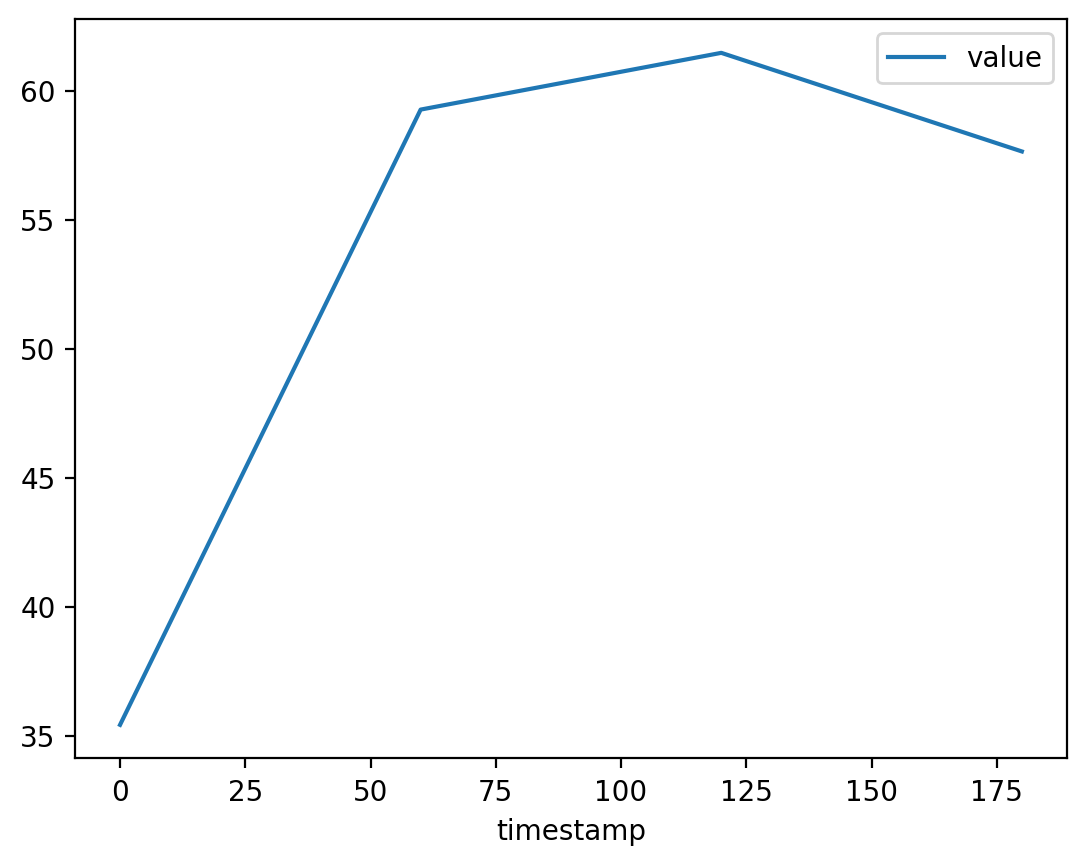

In [554]:
df_metrics.query("metric_name=='validation:accuracy'").plot(x='timestamp', y='value')

<a name='c2w2-2.2.'></a>
### 2.2. Analyze Debugger results

In [555]:
from IPython.core.display import display, HTML

display(
    HTML(
        '<b>Review <a target="blank" href="https://s3.console.aws.amazon.com/s3/buckets/{}?prefix={}/">S3 debugger output data</a></b>'.format(
            bucket, training_job_name
        )
    )
)

<a name='c2w2-2.3.'></a>
### 2.3. Download SageMaker debugger profiling report

In [556]:
profiler_report_s3_uri = "s3://{}/{}/rule-output/ProfilerReport/profiler-output".format(bucket, training_job_name)

In [557]:
!aws s3 ls $profiler_report_s3_uri/

                           PRE profiler-reports/
2022-10-04 21:18:01     380624 profiler-report.html
2022-10-04 21:18:01     229757 profiler-report.ipynb


In [558]:
!aws s3 cp --recursive $profiler_report_s3_uri ./profiler_report/

download: s3://sagemaker-us-east-1-441750884902/pytorch-training-2022-10-04-20-54-52-157/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json to profiler_report/profiler-reports/Dataloader.json
download: s3://sagemaker-us-east-1-441750884902/pytorch-training-2022-10-04-20-54-52-157/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json to profiler_report/profiler-reports/CPUBottleneck.json
download: s3://sagemaker-us-east-1-441750884902/pytorch-training-2022-10-04-20-54-52-157/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json to profiler_report/profiler-reports/BatchSize.json
download: s3://sagemaker-us-east-1-441750884902/pytorch-training-2022-10-04-20-54-52-157/rule-output/ProfilerReport/profiler-output/profiler-report.html to profiler_report/profiler-report.html
download: s3://sagemaker-us-east-1-441750884902/pytorch-training-2022-10-04-20-54-52-157/rule-output/ProfilerReport/profiler-output/profiler-report.ipyn

In [559]:
from IPython.core.display import display, HTML

display(HTML('<b>Review <a target="blank" href="./profiler_report/profiler-report.html">profiler report</a></b>'))

In [560]:
import time

pytorch_endpoint_name = '{}-{}-{}'.format(training_job_name, 'pt', timestamp)

print(pytorch_endpoint_name)

pytorch-training-2022-10-04-20-54-52-157-pt-1664297330


In [233]:
# %%time

# predictor = model.deploy(initial_instance_count=1, 
#                          instance_type='ml.m5.large', 
#                          endpoint_name=pytorch_endpoint_name)

NameError: name 'model' is not defined

In [ ]:
# from IPython.core.display import display, HTML

# display(HTML('<b>Review <a target="blank" href="https://console.aws.amazon.com/sagemaker/home?region={}#/endpoints/{}">SageMaker REST Endpoint</a></b>'.format(region, pytorch_endpoint_name)))